In [1]:
import pandas as pd
import DecisionBoundry
import contour
import numpy as np

In [2]:
train=pd.read_csv('train.csv').drop('Unnamed: 0',axis=1)
test=pd.read_csv('test.csv').drop('Unnamed: 0',axis=1)
df=pd.concat([test,train],axis=0)

df

,x1,x2,Class
0,269.53125,2265.62500,1
1,257.81250,2261.71875,1
2,285.15625,2292.96875,1
3,335.93750,1175.78125,1
4,371.09375,1941.40625,1
...,...,...,...
4786,734.37500,1074.21875,3
4787,722.65625,1031.25000,3
4788,730.46875,1089.84375,3
4789,750.00000,1035.15625,3


In [18]:

mean=np.mean(df[df['Class']==3][['x1','x2']].values,axis=0)
mean

array([0.29019753, 0.37011992])

In [3]:

db=DecisionBoundry.decisionBoundry(df,'Class',['x1','x2'])

In [4]:

cov_matrices = [
    np.cov(df[df['Class']==1]['x1'],df[df['Class']==1]['x2']).T,
    np.cov(df[df['Class']==2]['x1'],df[df['Class']==2]['x2']).T,
    np.cov(df[df['Class']==3]['x1'],df[df['Class']==3]['x2']).T
  ]

In [5]:

for idx, matrix in enumerate(cov_matrices):
    print(f"Updated Covariance Matrix {idx+1}:\n{matrix}\n")

Updated Covariance Matrix 1:
[[ 6995.06933652  1372.32013609]
 [ 1372.32013609 25953.6738307 ]]

Updated Covariance Matrix 2:
[[14957.24576947  -676.46394989]
 [ -676.46394989 11549.93164313]]

Updated Covariance Matrix 3:
[[7027.69071513 3566.47679164]
 [3566.47679164 6123.94449602]]



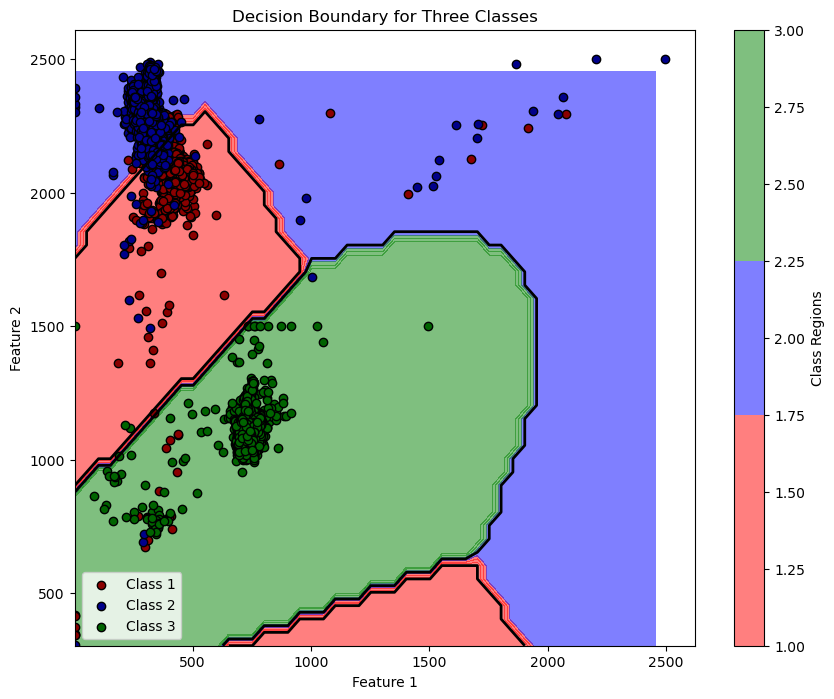

In [6]:
db.plot_decision(df,df['Class'])

In [7]:


z_cov_matrices=[]
for i in range(len(cov_matrices)):
    cov_matrix = cov_matrices[i]
    diag = np.diag(np.diag(cov_matrix))  
    z_cov_matrices.append(diag)
for idx, matrix in enumerate(z_cov_matrices):
    print(f"Updated Covariance Matrix {idx+1}:\n{matrix}\n")

Updated Covariance Matrix 1:
[[ 6995.06933652     0.        ]
 [    0.         25953.6738307 ]]

Updated Covariance Matrix 2:
[[14957.24576947     0.        ]
 [    0.         11549.93164313]]

Updated Covariance Matrix 3:
[[7027.69071513    0.        ]
 [   0.         6123.94449602]]



In [8]:

d_cov_matrices = []

for i in range(len(cov_matrices)):
    cov_matrix = cov_matrices[i]
    value=cov_matrix[0,0]
    diag = np.array([
        [value, 0],
        [0, value]
    ])  # Create the diagonal matrix with variance_x1
    d_cov_matrices.append(diag)

for idx, matrix in enumerate(d_cov_matrices):
    print(f"Updated Covariance Matrix {idx + 1}:\n{matrix}\n")

Updated Covariance Matrix 1:
[[6995.06933652    0.        ]
 [   0.         6995.06933652]]

Updated Covariance Matrix 2:
[[14957.24576947     0.        ]
 [    0.         14957.24576947]]

Updated Covariance Matrix 3:
[[7027.69071513    0.        ]
 [   0.         7027.69071513]]



In [9]:

c=contour.decisionBoundary(df,'Class',['x1','x2'])

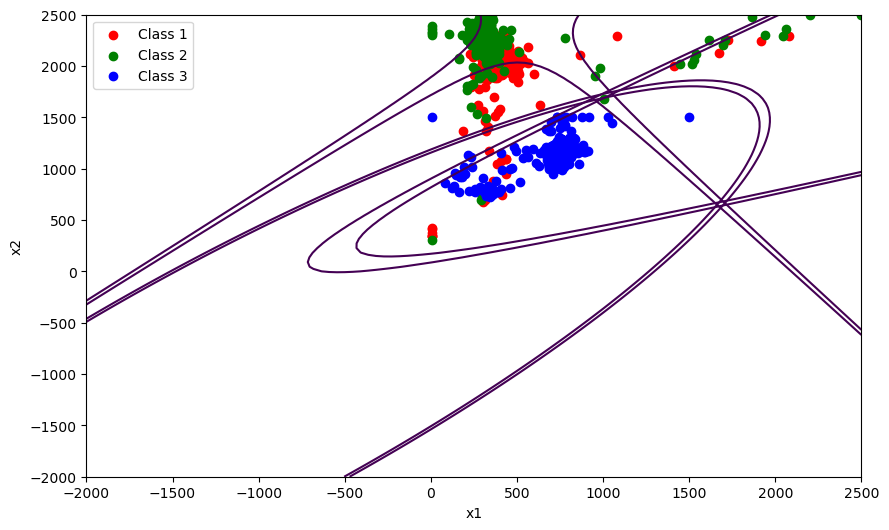

In [10]:


p1=c.plot_decision_boundaries_with_cov(cov_matrices,False)
p1

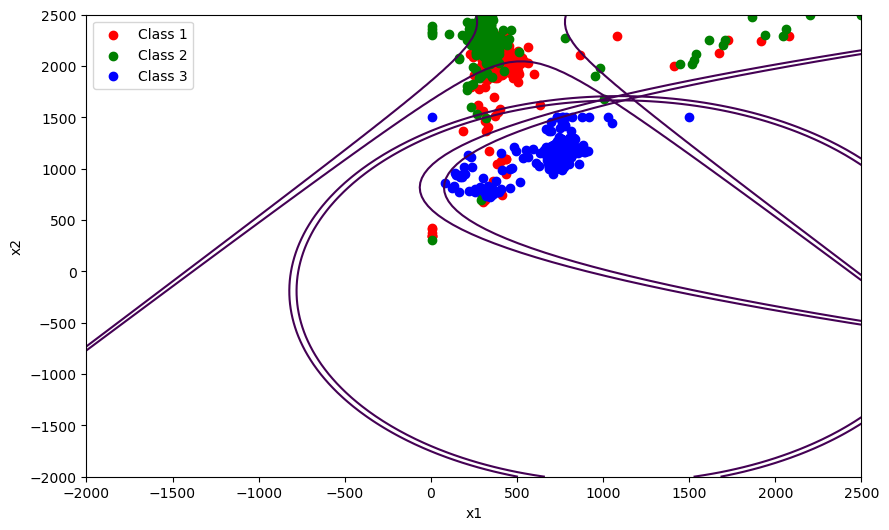

In [11]:

p3=c.plot_decision_boundaries_with_cov(z_cov_matrices,False)
p3

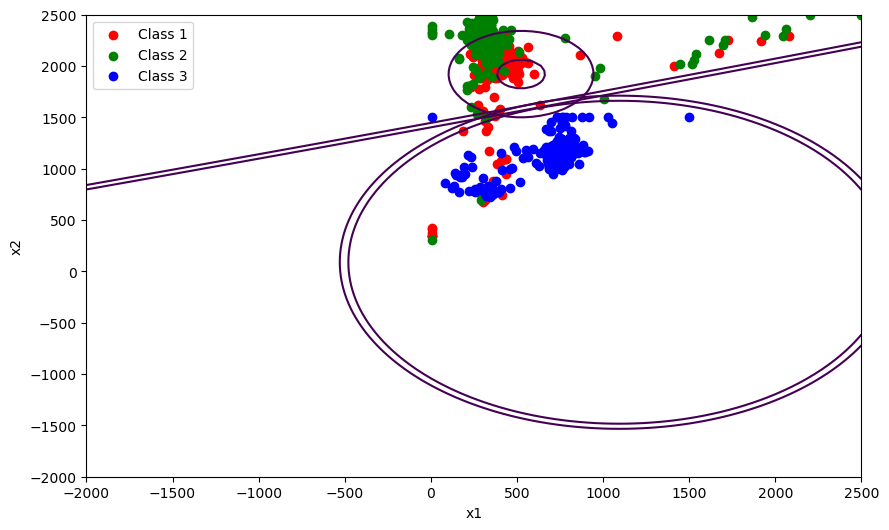

In [12]:

p5=c.plot_decision_boundaries_with_cov(d_cov_matrices,False)
p5



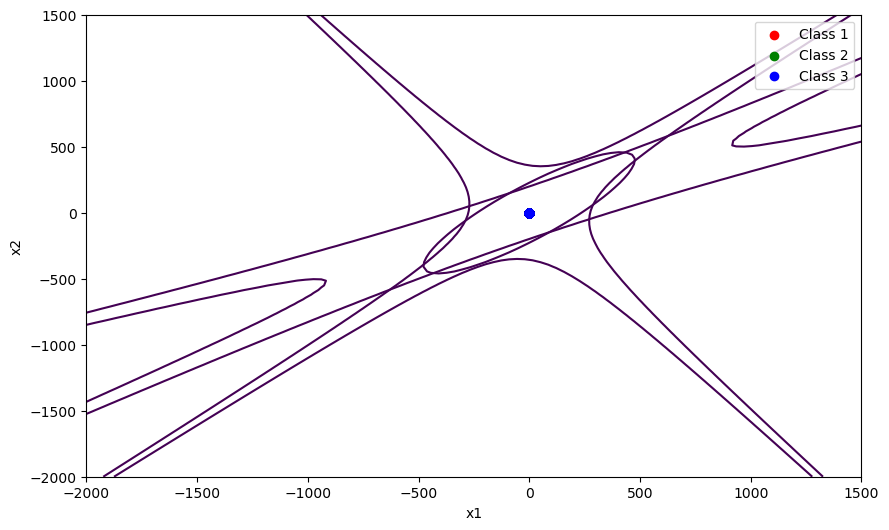

In [13]:

p2=c.plot_decision_boundaries_with_cov(cov_matrices,True)
p2

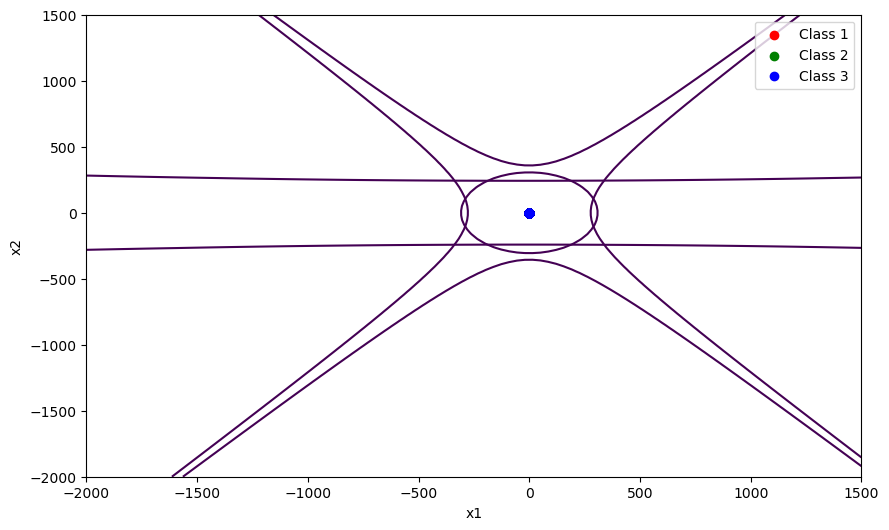

In [14]:

p4=c.plot_decision_boundaries_with_cov(z_cov_matrices,True)
p4

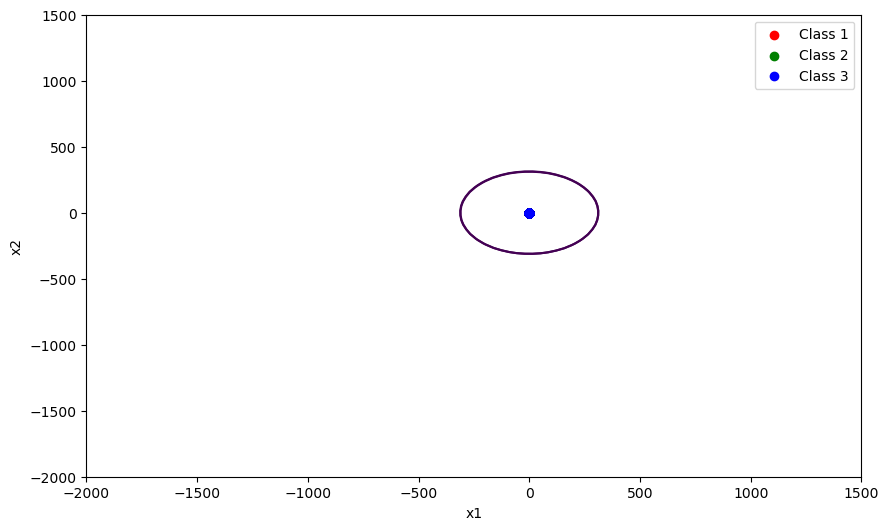

In [15]:

p6=c.plot_decision_boundaries_with_cov(d_cov_matrices,True)
p6